In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("all_seasons.csv")

# Data Cleaning
df = df[['player_name', 'team_abbreviation', 'age', 'gp', 'pts', 'ast', 'reb', 'ts_pct', 'usg_pct', 'ast_pct', 'season']]
df.dropna(inplace=True)

# Save cleaned data
df.to_csv("cleaned_nba_data.csv", index=False)

# MySQL Database Connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Ismail#1432",
    database="nba_database"
)
cursor = conn.cursor()

# Create Table
create_table_query = """
CREATE TABLE IF NOT EXISTS players_stats (
    player_name VARCHAR(255),
    team_abbreviation VARCHAR(10),
    age INT,
    gp INT,
    pts FLOAT,
    ast FLOAT,
    reb FLOAT,
    ts_pct FLOAT,
    usg_pct FLOAT,
    ast_pct FLOAT,
    season VARCHAR(20)
);
"""
cursor.execute(create_table_query)
conn.commit()

# Insert Data
for _, row in df.iterrows():
    insert_query = """
    INSERT INTO players_stats (player_name, team_abbreviation, age, gp, pts, ast, reb, ts_pct, usg_pct, ast_pct, season)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.execute(insert_query, tuple(row))
conn.commit()

# Queries
query_top_scorers = """
SELECT player_name, AVG(pts) AS avg_points 
FROM players_stats 
GROUP BY player_name 
ORDER BY avg_points DESC 
LIMIT 5;
"""
cursor.execute(query_top_scorers)
top_scorers = cursor.fetchall()
top_scorers = pd.DataFrame(top_scorers, columns=['player_name', 'avg_points'])

query_top_teams = """
SELECT team_abbreviation, AVG(pts) AS avg_team_points 
FROM players_stats 
GROUP BY team_abbreviation 
ORDER BY avg_team_points DESC 
LIMIT 5;
"""
cursor.execute(query_top_teams)
top_teams = cursor.fetchall()
top_teams = pd.DataFrame(top_teams, columns=['team_abbreviation', 'avg_team_points'])

query_top_assists = """
SELECT player_name, season, MAX(ast) AS max_assists 
FROM players_stats 
GROUP BY player_name, season 
ORDER BY max_assists DESC 
LIMIT 5;
"""
cursor.execute(query_top_assists)
top_assist_players = cursor.fetchall()
top_assist_players = pd.DataFrame(top_assist_players, columns=['player_name', 'season', 'max_assists'])

# Close Connection
cursor.close()
conn.close()

C:\Users\MD Ismail\AppData\Local\Temp\ipykernel_13556\2445231432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_name', y='avg_points', data=top_scorers, palette='Blues')


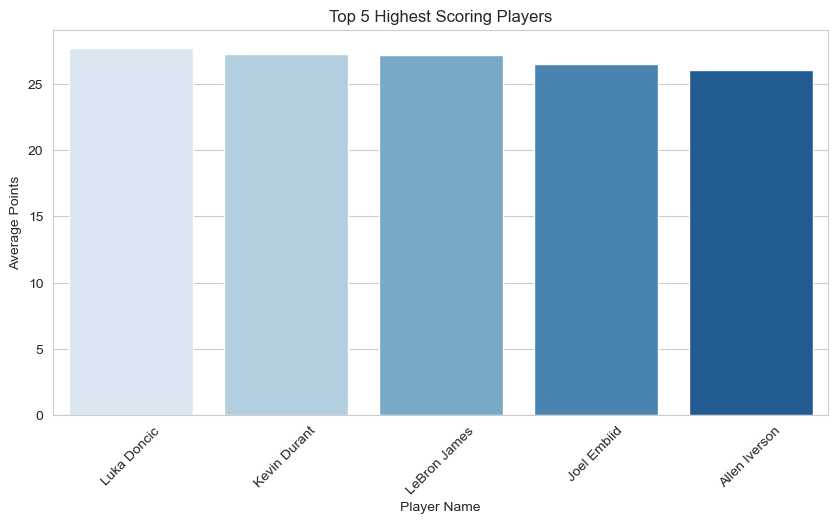

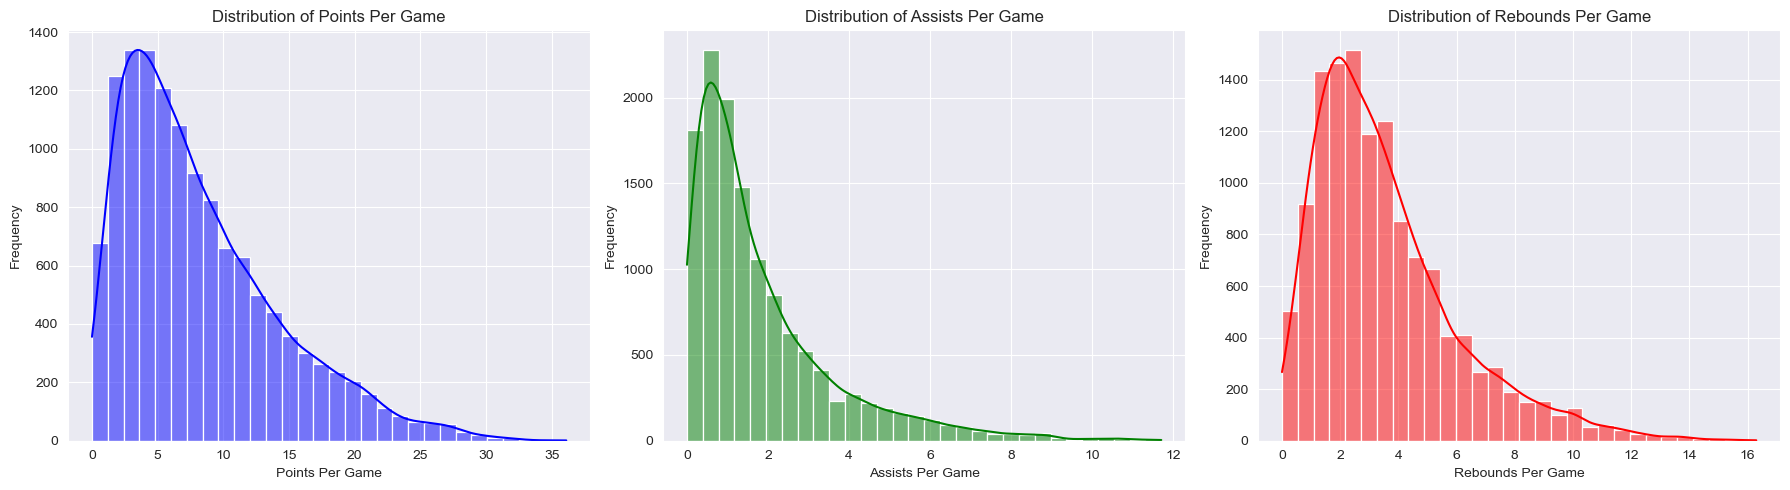

C:\Users\MD Ismail\AppData\Local\Temp\ipykernel_13556\2445231432.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pts", y="team_abbreviation", data=top_teams, ax=axes[0], palette="Blues_r")
C:\Users\MD Ismail\AppData\Local\Temp\ipykernel_13556\2445231432.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ast", y="team_abbreviation", data=top_teams, ax=axes[1], palette="Greens_r")
C:\Users\MD Ismail\AppData\Local\Temp\ipykernel_13556\2445231432.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="reb", y="team_abbreviation", da

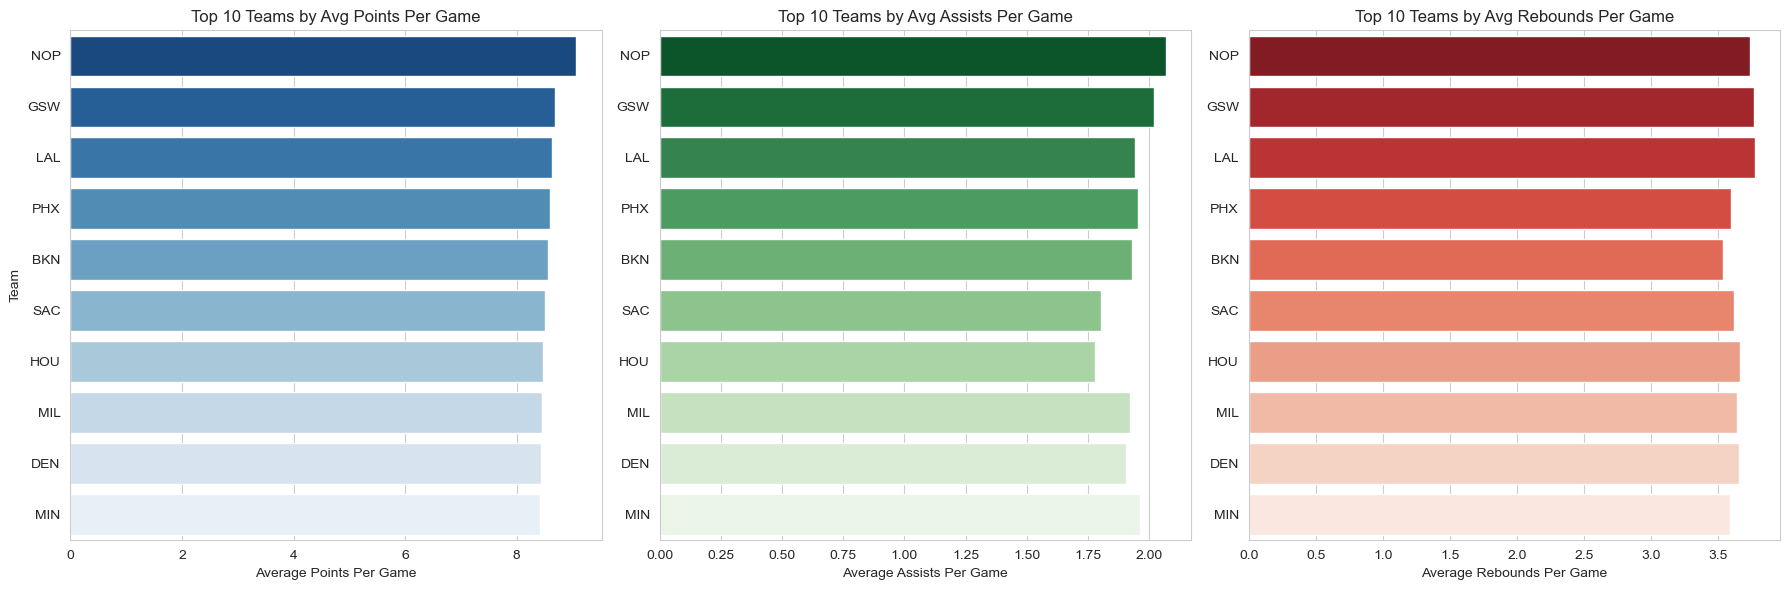

In [11]:
# Visualization
# Load cleaned dataset
df = pd.read_csv("cleaned_nba_data.csv")

# Column chart Visualization
plt.figure(figsize=(10,5))
sns.barplot(x='player_name', y='avg_points', data=top_scorers, palette='Blues')
plt.title("Top 5 Highest Scoring Players")
plt.xlabel("Player Name")
plt.ylabel("Average Points")
plt.xticks(rotation=45)
plt.show()

# Set Seaborn style
sns.set_style("darkgrid")

# Create subplots for Points, Assists, and Rebounds distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Points Per Game Distribution
sns.histplot(df['pts'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Points Per Game")
axes[0].set_xlabel("Points Per Game")
axes[0].set_ylabel("Frequency")

# Assists Per Game Distribution
sns.histplot(df['ast'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Assists Per Game")
axes[1].set_xlabel("Assists Per Game")
axes[1].set_ylabel("Frequency")

# Rebounds Per Game Distribution
sns.histplot(df['reb'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title("Distribution of Rebounds Per Game")
axes[2].set_xlabel("Rebounds Per Game")
axes[2].set_ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()



# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots for Points, Assists, and Rebounds per Team
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Average Points Per Game by Team
sns.barplot(x="pts", y="team_abbreviation", data=top_teams, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Teams by Avg Points Per Game")
axes[0].set_xlabel("Average Points Per Game")
axes[0].set_ylabel("Team")

# Average Assists Per Game by Team
sns.barplot(x="ast", y="team_abbreviation", data=top_teams, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Teams by Avg Assists Per Game")
axes[1].set_xlabel("Average Assists Per Game")
axes[1].set_ylabel("")

# Average Rebounds Per Game by Team
sns.barplot(x="reb", y="team_abbreviation", data=top_teams, ax=axes[2], palette="Reds_r")
axes[2].set_title("Top 10 Teams by Avg Rebounds Per Game")
axes[2].set_xlabel("Average Rebounds Per Game")
axes[2].set_ylabel("")

# Adjust layout and show plots
plt.tight_layout()
plt.show()